# Constraint programming

Python 2


# 8 circles in a network puzzle

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 17
Average degree:   4.2500


<IPython.core.display.Javascript object>


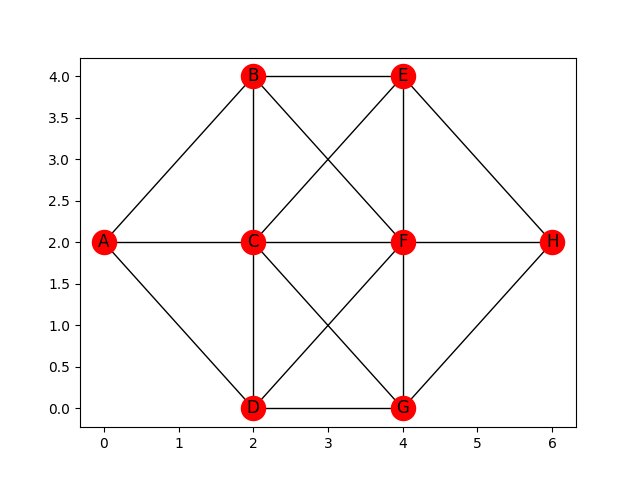

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib notebook

grph = nx.Graph()

grph.add_edges_from([('A','B'),('A','C'),('A','D'), 
                     ('B','E'),('B','F'),('B','C'), 
                     ('C','D'),('C','E'),('C','F'),('C','G'), 
                     ('D','F'),('D','G'), 
                     ('E','H'),('E','F'), 
                     ('F','H'),('F','G'),
                     ('G','H')])
initialpos = {'A':(0,2), 'B':(2,4), 'C':(2,2), 'D':(2,0), 'E':(4,4), 'F':(4,2), 'G':(4,0), 'H':(6,2)}

pos = nx.spring_layout(grph, fixed = initialpos, pos = initialpos)
print nx.info(grph)

nx.draw_networkx(grph, pos)
# plt.axis('off')
plt.show()

# Solve puzzle

In [36]:
from constraint import *

# 8 circles in a graph: 
# put a number in each circle (1 to 8) such that adjacent circles
# can not take consecutive numbers.
puzzle = Problem()
puzzle.addVariables('ABCDEFGH', range(1, 9))
puzzle.addConstraint(AllDifferentConstraint())

def dif(a, b, n=1):
    return abs(a - b) > n


puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(a, b) and dif(a, c) and dif(a, d),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(b, c) and dif(b, e) and dif(b, f),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(c, d) and dif(c, e) and dif(c, f) and dif(c, g),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(d, f) and dif(d, g),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(e, f) and dif(e, h),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(f, g) and dif(f, h),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(g, h),
                     'ABCDEFGH')

solutions = sorted(puzzle.getSolutions())
print 'All solutions:'
for sol in solutions:
    print sol

print 'Solution for the maximum distance between B and G:'
maxdistance = 0
for sol in solutions:
    if abs(sol['B'] - sol['G']) > maxdistance:
        maxdistance = abs(sol['B'] - sol['G'])
        maxsolc = sol

print(maxsolc)

All solutions:
{'A': 2, 'C': 8, 'B': 5, 'E': 3, 'D': 6, 'G': 4, 'F': 1, 'H': 7}
{'A': 2, 'C': 8, 'B': 6, 'E': 4, 'D': 5, 'G': 3, 'F': 1, 'H': 7}
{'A': 7, 'C': 1, 'B': 3, 'E': 5, 'D': 4, 'G': 6, 'F': 8, 'H': 2}
{'A': 7, 'C': 1, 'B': 4, 'E': 6, 'D': 3, 'G': 5, 'F': 8, 'H': 2}
Solution for the maximum distance between B and G:
{'A': 2, 'C': 8, 'B': 6, 'E': 4, 'D': 5, 'G': 3, 'F': 1, 'H': 7}


# Draw graph for a solution

<IPython.core.display.Javascript object>


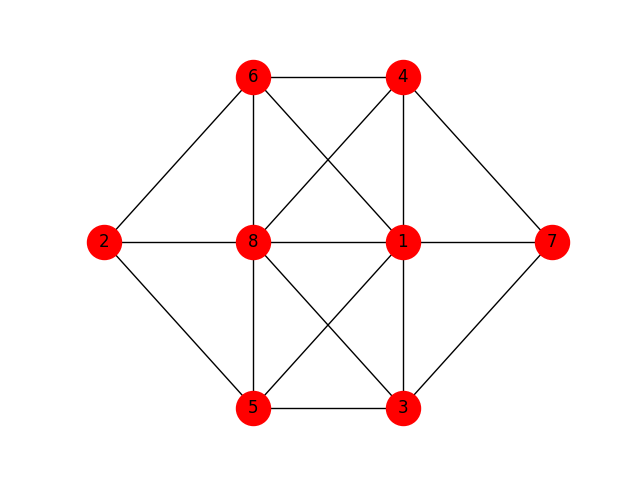

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib notebook

solution = {'A': 2, 'C': 8, 'B': 6, 'E': 4, 'D': 5, 'G': 3, 'F': 1, 'H': 7}

grph = nx.Graph()

grph.add_edges_from([('A','B'),('A','C'),('A','D'), 
                     ('B','E'),('B','F'),('B','C'), 
                     ('C','D'),('C','E'),('C','F'),('C','G'), 
                     ('D','F'),('D','G'), 
                     ('E','H'),('E','F'), 
                     ('F','H'),('F','G'),
                     ('G','H')])
initialpos = {'A':(0,2), 'B':(2,4), 'C':(2,2), 'D':(2,0), 'E':(4,4), 'F':(4,2), 'G':(4,0), 'H':(6,2)}

pos = nx.spring_layout(grph, fixed = initialpos, pos = initialpos)
# Draw the graph using Matplotlib
nx.draw_networkx(grph, pos, node_size = 600, widths = 3, labels = solution)
plt.axis('off')
plt.show()